Predict Disease Outcome Based on Genetic and Clinical Data

📂 Upload your dataset...


Saving 3. Predict Disease Outcome Based on Genetic and Clinical Data.csv to 3. Predict Disease Outcome Based on Genetic and Clinical Data (6).csv

✅ Auto-selected 'diagnosis' as the target column.

📊 Evaluation Metrics:
✅ Accuracy : 0.9649
✅ Precision: 0.9756
✅ Recall   : 0.9302


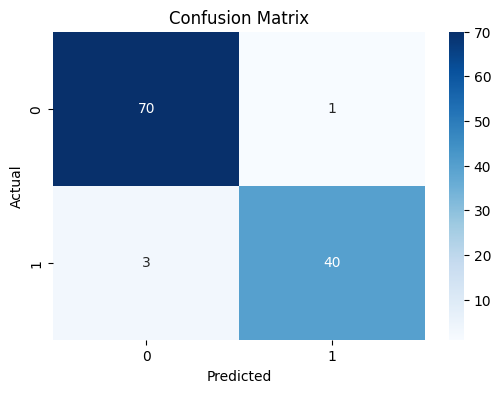

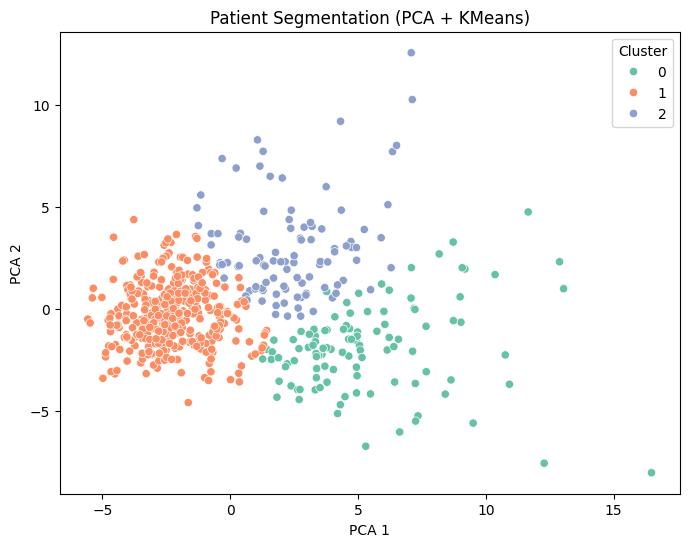

In [8]:
# ✅ Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA

from google.colab import files

# ✅ Step 2: Upload your dataset
print("📂 Upload your dataset...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# ✅ Step 3: Clean column names and remove empty/unnamed columns
df.columns = df.columns.str.strip()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.dropna(axis=1, how='all', inplace=True)

# ✅ Step 4: Auto-select a target column (object or ≤10 unique values)
potential_targets = [col for col in df.columns if df[col].nunique() <= 10]
if not potential_targets:
    raise ValueError("❌ No suitable classification target column found.")

target_column = potential_targets[0]
print(f"\n✅ Auto-selected '{target_column}' as the target column.")

# ✅ Step 5: Drop rows where target is missing
df = df.dropna(subset=[target_column])

# ✅ Step 6: Encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

# ✅ Step 7: Feature-target split
X = df.drop(target_column, axis=1)
y = df[target_column]

# ✅ Step 8: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 9: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Step 10: Train classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Step 11: Evaluate model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary' if len(np.unique(y)) == 2 else 'macro')
rec = recall_score(y_test, y_pred, average='binary' if len(np.unique(y)) == 2 else 'macro')

print("\n📊 Evaluation Metrics:")
print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall   : {rec:.4f}")

# ✅ Step 12: Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Step 13: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# ✅ Step 14: PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2')
plt.title("Patient Segmentation (PCA + KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()
